<h1>About This Project</h1>

<p>
In this project, our group will explore the affects of three (3) different models and their effect on classificaiton: Softmax Regression, Support Vector Machine, and Random forest. After exploring the possible hyperparameters for each, we will choose the best and combine them to create an ensemble and analyze its performance against the individial models.

For these models, we will be working with a rock dataset where we by trying to predict the label "rock type" (i.e. igneous = 1, metamorphic = 2, and sedimentary = 3). The dataset contains describing attributes for each, such as texture, stripes, etc.

Lastly, we will compute the accuracy of Human Classification of the rock to the accuracy of our model. We will perform an analyses on the correlation between our model probabilities, and the average human accuracies.
</p>

<p><strong>Group Members</strong>: Peter Heile, Akanksha Khurd, and Anshika Bajpai</p>
<p><strong>Dataset:</strong> <a href = "https://osf.io/cvwu9/wiki/Data%20File%20Descriptions/">Click Here for Dataset</a></p>
<p><strong>Sources: We can put sources here later</strong></p>

<h2>Pt. 1.1: Getting Our Dataset</h2>

In [22]:
import pandas as pd

#Get the dataset features
dataset_features_filepath = r".\Dataset\feature_presence540.txt"
# dataset_features_filepath = r"/content/feature_presence540.txt" --anshika
#dataset_features_filepath = r"./Dataset/feature_presence540.txt"
df_all_features = pd.read_csv(dataset_features_filepath, delimiter='\s+', header = None)

#get the dataset labels: igneous = 1, metamorphic = 2, and sedimentary = 3
dataset_labels_filepath = r'.\Dataset\aggregateRockData.xlsx'
# dataset_labels_filepath = r"/content/aggregateRockData.xlsx" --anshika
#dataset_labels_filepath = r'./Dataset/aggregateRockData.xlsx'
df_all_labels = pd.read_excel(dataset_labels_filepath, header = None)

#Per the directions, we only want to use the first 480 instances, and columns 4-14 inclusive as attributes
df_features = df_all_features.iloc[0:480, 3:14]
print(f"\nFeatures Loaded Successfuly: {df_features.shape == (480, 11)}")
print(f"Features Count: {df_features.shape[1]}, Instance Count: {df_features.shape[0]}")

#Per the directions, we only want to use the first 480 instances, this means labels also
df_labels = df_all_labels.loc[0:479, [1]]
print(f"\nLabels Loaded Successfuly: {df_labels.shape == (480, 1)}")
print(f"Labels Count: {df_labels.shape[1]}, Instance Count: {df_features.shape[0]}")

#combine into one dataset to start for analysis
df_data = pd.concat([df_labels, df_features], axis=1)
print(f"\nLabels and Attributes Concatinated Successfully: {df_labels.shape[0] == df_features.shape[0]}")

#Add column names to help our viewing and analysis
df_data_names = ['Category number', 'Angular fragments', 'Rounded fragments', 'Straight stripes',
                'Curved stripes', 'Physical layers', 'Veins', 'Oily/shimmery texture',
                'Splotchy texture', 'Single translucent crystal','Multiple cubic crystals', 'Sandy texture']
df_data.columns = df_data_names



Features Loaded Successfuly: True
Features Count: 11, Instance Count: 480

Labels Loaded Successfuly: True
Labels Count: 1, Instance Count: 480

Labels and Attributes Concatinated Successfully: True


In [23]:
#Preview of the dataset and basic information
print("\nDataset Preview: ")
df_data.head()


Dataset Preview: 


,Category number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [24]:
#Print the data info (such as data types)
print("Dataset Basic Information: \n")
df_data.info()

Dataset Basic Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category number             480 non-null    int64  
 1   Angular fragments           480 non-null    object 
 2   Rounded fragments           480 non-null    object 
 3   Straight stripes            480 non-null    object 
 4   Curved stripes              480 non-null    float64
 5   Physical layers             480 non-null    float64
 6   Veins                       480 non-null    float64
 7   Oily/shimmery texture       480 non-null    float64
 8   Splotchy texture            480 non-null    float64
 9   Single translucent crystal  480 non-null    float64
 10  Multiple cubic crystals     480 non-null    float64
 11  Sandy texture               480 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 45.1+ KB


In [25]:
#We can see that we will need to need to convert the objects features to values to perform model calulcations
#Convert to values and show updates dataset
df_data['Angular fragments'] = pd.to_numeric(df_data['Angular fragments'], errors='coerce')
df_data['Rounded fragments'] = pd.to_numeric(df_data['Rounded fragments'], errors='coerce')

print("Adjusted Dataset Information: \n")
df_data.info()

Adjusted Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category number             480 non-null    int64  
 1   Angular fragments           480 non-null    float64
 2   Rounded fragments           480 non-null    float64
 3   Straight stripes            480 non-null    object 
 4   Curved stripes              480 non-null    float64
 5   Physical layers             480 non-null    float64
 6   Veins                       480 non-null    float64
 7   Oily/shimmery texture       480 non-null    float64
 8   Splotchy texture            480 non-null    float64
 9   Single translucent crystal  480 non-null    float64
 10  Multiple cubic crystals     480 non-null    float64
 11  Sandy texture               480 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 45.1+ KB


<h2>Pt. 1.2: Data Distributions</h2>

In [26]:
#now we want to do some basic data analysis and view destributions
#We start by viewing the statistical Values for the each of the attributes
df_data.describe()

,Category number,Angular fragments,Rounded fragments,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2.000000,0.084479,0.080208,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854
std,0.817348,0.193996,0.197648,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000
75%,3.000000,0.050000,0.050000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000
max,3.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000


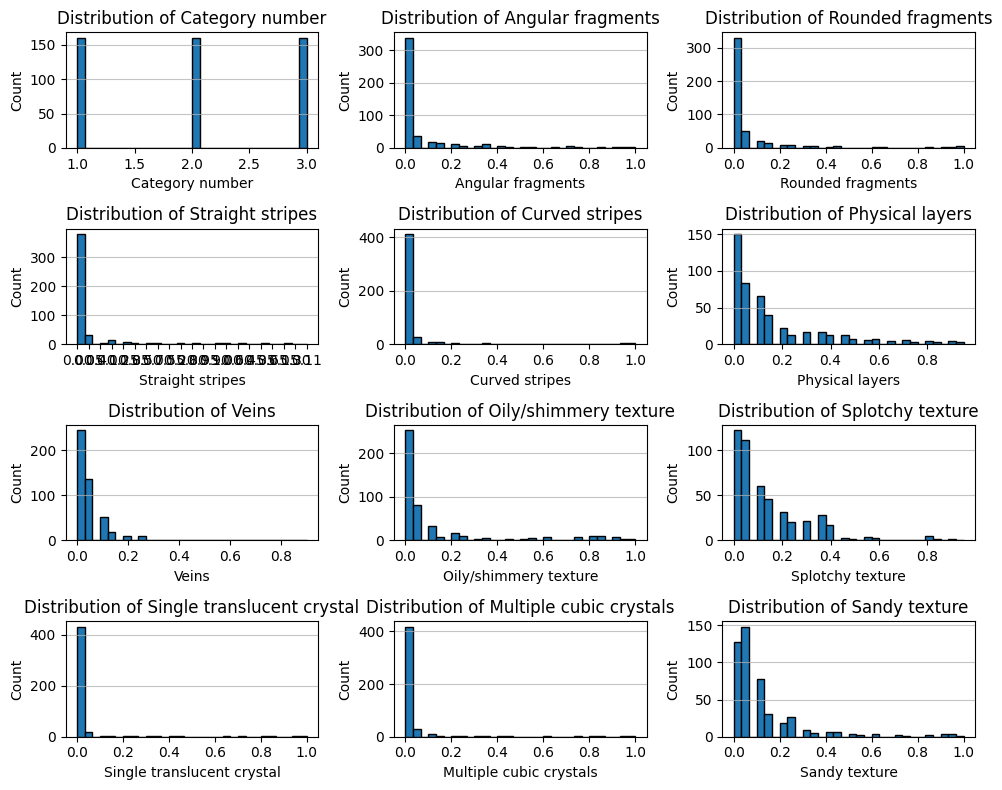

In [27]:
#Now we want to view the distibutions of ecah attribute and our label
import matplotlib.pyplot as plt

columns = df_data.columns

#create a grid for each plot
fig, axes = plt.subplots(len(columns)//3, 3, figsize=(10, 8))
axes = axes.flatten()

#plot the histogram distribution of each attribute and the label
for i, column in enumerate(columns):
    axes[i].hist(df_data[column], bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

<h3>Pt. 1 Analysis:</h3>

<p>
Analysis Goes Here
</p>

<h2>Pt. 2: Data Relationships</h2>

In [28]:
#now we are going to be finding the relationships between our data and the label ("Category Number")
#to do this, we can use Pearson Correlation Coefficient to find linear relationships

# Compute the pearson correlation for each label
df_pcc_matrix = df_data.corr(method='pearson')

#This gets the list of feature relationships to our label ("category Number")
pcc_category_number = df_pcc_matrix['Category number']

print(f"Pearson Correlation Coefficients to Label: \n")
print(pcc_category_number)

Pearson Correlation Coefficients to Label: 

Category number               1.000000
Angular fragments            -0.122447
Rounded fragments             0.017446
Straight stripes              0.077495
Curved stripes               -0.017454
Physical layers               0.266699
Veins                         0.140553
Oily/shimmery texture         0.008172
Splotchy texture             -0.229273
Single translucent crystal    0.258910
Multiple cubic crystals       0.113872
Sandy texture                 0.139845
Name: Category number, dtype: float64


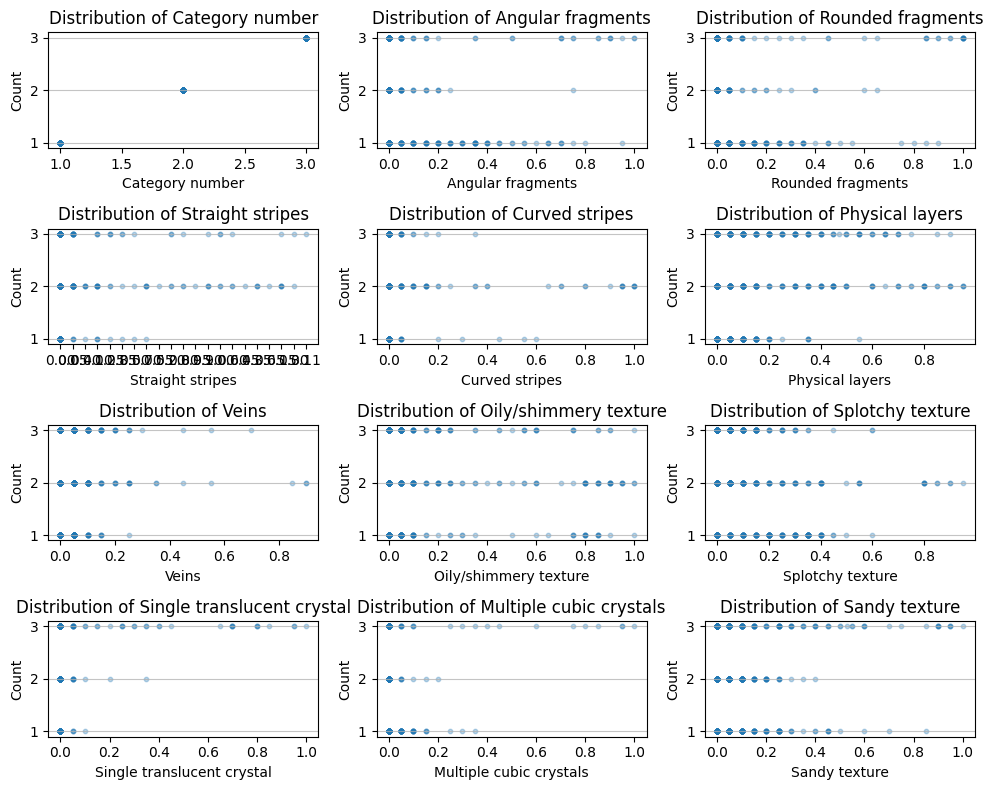

In [29]:
#Although we can tell linear relationships witht he PCC values, it also helps to visualize so we understand better
#Here we will plot each instance value relative to our prediction label to help find linear relationships

columns = df_data.columns

#create a grid for each plot
fig, axes = plt.subplots(len(columns)//3, 3, figsize=(10, 8))
axes = axes.flatten()


#plot the histogram distribution of each attribute and the label
for i, column in enumerate(columns):
    axes[i].scatter(df_data[column], df_data['Category number'], alpha=0.3, s=10)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

<h3>Pt. 2: Analysis</h3>

<p>
    Analysis Goes Here
</p>

<h2>Pt. 3: Data Splitting</h3>

In [30]:
#How we will split our data depends on token numbers, which is one of the features from the original dataset
#I did not retreive it as a feature to analyze because it won't be used for any other purpose than splitting

#get the Token numbers and add it to the dataset for splitting
df_split_tokens = df_all_features.iloc[0:480, 2:3]
df_split_tokens.columns = ['Token number']
df_data_with_tokens = pd.concat([df_split_tokens, df_data], axis=1)

#It needs to be converted from an object data type into a numberical datatype
df_data_with_tokens['Token number'] = pd.to_numeric(df_data_with_tokens['Token number'], errors='coerce')

#shuffle the data for training in case needed
# df_data_with_tokens = df_data_with_tokens.sample(frac = 1).reset_index(drop = True)

#NOTE: for each, I get rid of the token number attribute because it will not be used for training
#Tokens 1-10 are train instances.
train = df_data_with_tokens[df_data_with_tokens['Token number'].between(1, 10)].iloc[:, 1:]
print(f"Training Data Shape: {train.shape}")

#Token number 11-13 are validation
val = df_data_with_tokens[df_data_with_tokens['Token number'].between(11, 13)].iloc[:, 1:]
print(f"Validation Data Shape: {val.shape}")

#token number 14-16 are testing
test = df_data_with_tokens[df_data_with_tokens['Token number'].between(14, 16)].iloc[:, 1:]
print(f"Testing Data Shape: {test.shape}")

Training Data Shape: (300, 12)
Validation Data Shape: (90, 12)
Testing Data Shape: (90, 12)


In [31]:
#now that we have each train, val, and test set we split it into label and features
#I also want them as numpy arrays now

#training predictors and labels
X_train, y_train = train.iloc[:, 1:].to_numpy(), train.iloc[:, 0:1].to_numpy()
print(f"\nTraining Feature Shape: {X_train.shape}\nTraining Lables Shape: {y_train.shape}")

#testing predictors and labels
X_test, y_test = test.iloc[:, 1:].to_numpy(), test.iloc[:, 0:1].to_numpy()
print(f"\nTest Feature Shape: {X_test.shape}\nTest Lables Shape: {y_test.shape}")

#validation predictors and labels
X_val, y_val = val.iloc[:, 1:].to_numpy(), val.iloc[:, 0:1].to_numpy()
print(f"\nValidation Feature Shape: {X_val.shape}\nValidation Lables Shape: {y_val.shape}")


Training Feature Shape: (300, 11)
Training Lables Shape: (300, 1)

Test Feature Shape: (90, 11)
Test Lables Shape: (90, 1)

Validation Feature Shape: (90, 11)
Validation Lables Shape: (90, 1)


<h4>Pt. 3 Analysis:</h4>

<p>
Analysis Goes Here
</p>

<h2>Pt. 4.1: Softmax Regression Model</h2>

In [32]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train.ravel())

veri_hat = softmax_reg.predict(X_val)

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print("Accuracy: ", accuracy_score(veri_hat, y_val))
print("Precision: ", precision_score(veri_hat, y_val, average='weighted'))
print("Recall: ", recall_score(veri_hat, y_val, average='weighted'))
print("F1 Score: ", f1_score(veri_hat, y_val, average='weighted'))

Accuracy:  0.7555555555555555
Precision:  0.7807407407407407
Recall:  0.7555555555555555
F1 Score:  0.7609544577286513


There is another solver called liblinear, but it does not support multi class classification, that is why it has not been included in the analysis.

Based on the collected information, lbfgs and newton-cg solvers are used for comparitively smaller datasets, while sag and saga are used for comparitively larger datasets.

Another interesting analysis would be to investigate the impact of the regularization on all of these solvers.

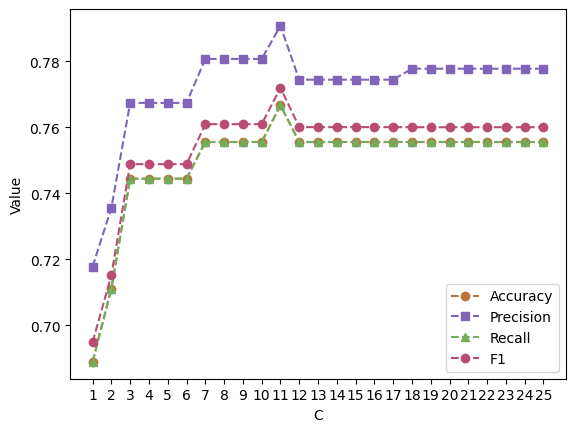

In [33]:
# Exploring the hyperparameters: Exploring regularization parameter C
import numpy as np

C_vals = np.array([i for i in range(1,26)])
acc_sc = []
prec_sc = []
rec_sc = []
f1_sc =[]

for C in C_vals:
    softmax_regC = LogisticRegression(solver="lbfgs", C=C)
    softmax_regC.fit(X_train, y_train.ravel())

    veri_hat = softmax_regC.predict(X_val)

    acc_sc.append(accuracy_score(veri_hat, y_val))
    prec_sc.append(precision_score(veri_hat, y_val, average='weighted'))
    rec_sc.append(recall_score(veri_hat, y_val, average='weighted'))
    f1_sc.append(f1_score(veri_hat, y_val, average='weighted'))

    # print ("Softmax regression with C = "+str(C))
    # print("Accuracy: ", accuracy_score(veri_hat, y_val))
    # print("Precision: ", precision_score(veri_hat, y_val, average='weighted'))
    # print("Recall: ", recall_score(veri_hat, y_val, average='weighted'))
    # print("F1 Score: ", f1_score(veri_hat, y_val, average='weighted'))
    # print()

plt.figure()
plt.plot(C_vals,acc_sc,label = "Accuracy", color = "#bb7438", marker = "o", linestyle = "--")
plt.plot(C_vals,prec_sc,label = "Precision", color = "#7f64b9", marker = "s", linestyle = "--")
plt.plot(C_vals,rec_sc,label = "Recall", color = "#72ac5c", marker = "^", linestyle = "--")
plt.plot(C_vals,f1_sc,label = "F1", color = "#b94b75", marker = "o", linestyle = "--")
plt.xlabel("C")
plt.ylabel("Value")
plt.xticks([i for i in range(1,26)],[i for i in range(1,26)] )
plt.legend()
plt.show()

In [34]:
# Exploring the hyperparameters: Exploring the solver

solvers = ["lbfgs", "newton-cg", "sag", "saga"]

for solver in solvers:
    softmax_regC = LogisticRegression(solver=solver, C=10)
    softmax_regC.fit(X_train, y_train.ravel())
    veri_hat = softmax_regC.predict(X_val)

    print ("Softmax regression with solver = "+solver)
    print("Accuracy: ", accuracy_score(veri_hat, y_val))
    print("Precision: ", precision_score(veri_hat, y_val, average='weighted'))
    print("Recall: ", recall_score(veri_hat, y_val, average='weighted'))
    print("F1 Score: ", f1_score(veri_hat, y_val, average='weighted'))
    print()

Softmax regression with solver = lbfgs
Accuracy:  0.7555555555555555
Precision:  0.7807407407407407
Recall:  0.7555555555555555
F1 Score:  0.7609544577286513

Softmax regression with solver = newton-cg
Accuracy:  0.7555555555555555
Precision:  0.7807407407407407
Recall:  0.7555555555555555
F1 Score:  0.7609544577286513

Softmax regression with solver = sag
Accuracy:  0.7555555555555555
Precision:  0.7807407407407407
Recall:  0.7555555555555555
F1 Score:  0.7609544577286513

Softmax regression with solver = saga
Accuracy:  0.7555555555555555
Precision:  0.7807407407407407
Recall:  0.7555555555555555
F1 Score:  0.7609544577286513



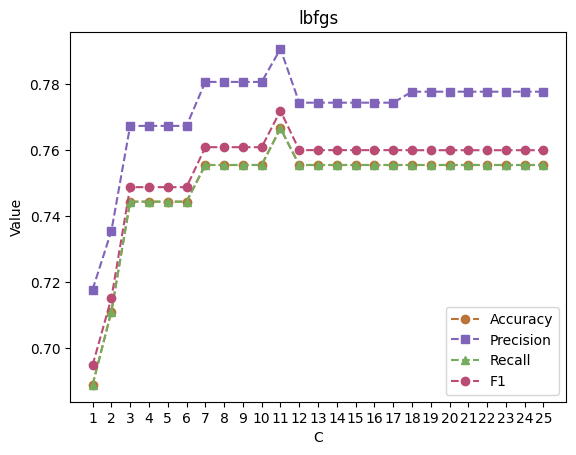

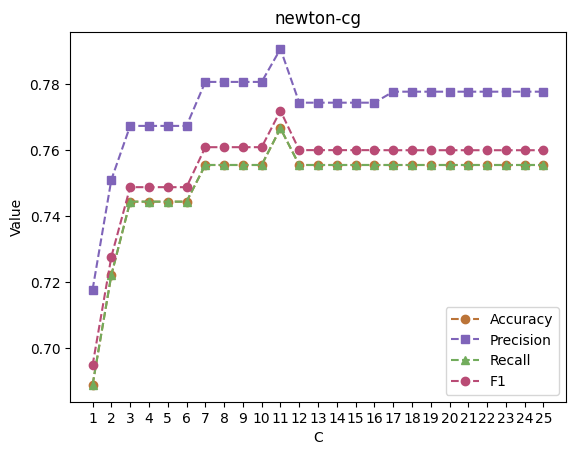

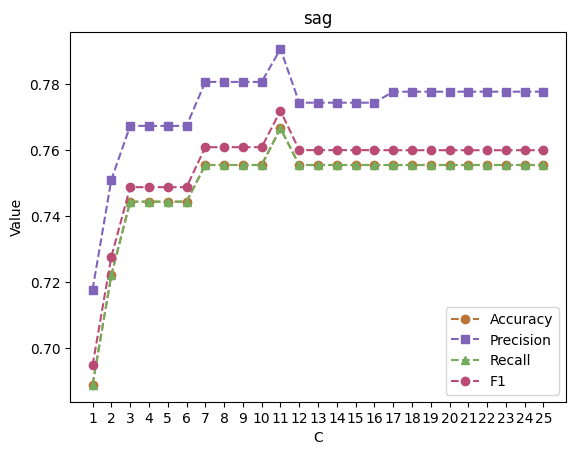

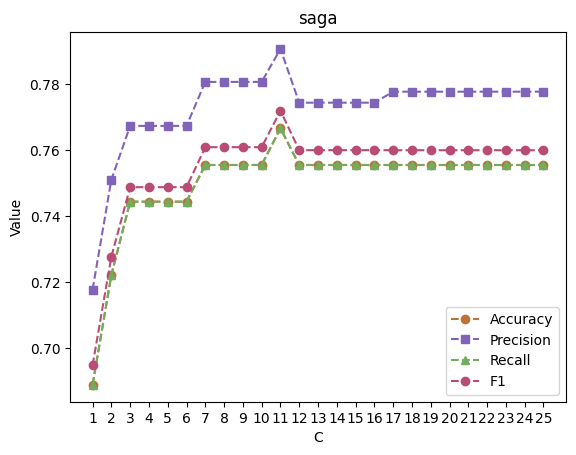

In [35]:
solvers = ["lbfgs", "newton-cg", "sag", "saga"]
C_vals = np.array([i for i in range(1,26)])

for solver in solvers:
    acc_sc = []
    prec_sc = []
    rec_sc = []
    f1_sc =[]

    for C in C_vals:
        softmax_regC = LogisticRegression(solver=solver, C=C)
        softmax_regC.fit(X_train, y_train.ravel())

        veri_hat = softmax_regC.predict(X_val)

        acc_sc.append(accuracy_score(veri_hat, y_val))
        prec_sc.append(precision_score(veri_hat, y_val, average='weighted'))
        rec_sc.append(recall_score(veri_hat, y_val, average='weighted'))
        f1_sc.append(f1_score(veri_hat, y_val, average='weighted'))

    plt.figure()
    plt.plot(C_vals,acc_sc,label = "Accuracy", color = "#bb7438", marker = "o", linestyle = "--")
    plt.plot(C_vals,prec_sc,label = "Precision", color = "#7f64b9", marker = "s", linestyle = "--")
    plt.plot(C_vals,rec_sc,label = "Recall", color = "#72ac5c", marker = "^", linestyle = "--")
    plt.plot(C_vals,f1_sc,label = "F1", color = "#b94b75", marker = "o", linestyle = "--")
    plt.xlabel("C")
    plt.ylabel("Value")
    plt.title(solver)
    plt.xticks([i for i in range(1,26)],[i for i in range(1,26)] )
    plt.legend()
    plt.show()

In this case, we see that changing the solver does not impact the output for any of the scores. However, as lbfgs and newton-cg are to be used for smaller datasets and ours is a small dataset, I would choose lbfgs, with C = 11. The final parameter to investigate is the number of iterations.

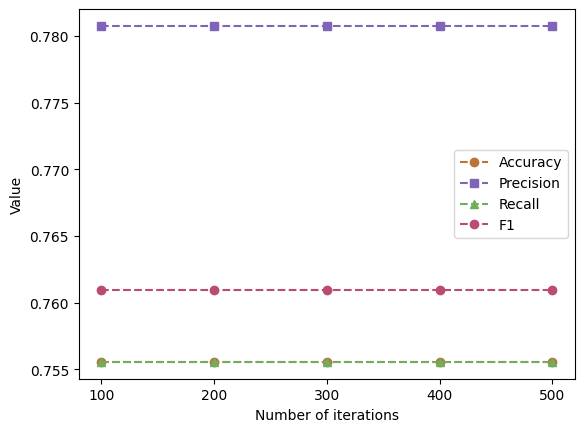

In [36]:
n_iterations = np.array([i for i in range(100,600,100)])
acc_sc = []
prec_sc = []
rec_sc = []
f1_sc =[]

for n in n_iterations:
    softmax_regC = LogisticRegression(solver="lbfgs", C=10, max_iter = n)
    softmax_regC.fit(X_train, y_train.ravel())

    veri_hat = softmax_regC.predict(X_val)

    acc_sc.append(accuracy_score(veri_hat, y_val))
    prec_sc.append(precision_score(veri_hat, y_val, average='weighted'))
    rec_sc.append(recall_score(veri_hat, y_val, average='weighted'))
    f1_sc.append(f1_score(veri_hat, y_val, average='weighted'))

plt.figure()
plt.plot(n_iterations,acc_sc,label = "Accuracy", color = "#bb7438", marker = "o", linestyle = "--")
plt.plot(n_iterations,prec_sc,label = "Precision", color = "#7f64b9", marker = "s", linestyle = "--")
plt.plot(n_iterations,rec_sc,label = "Recall", color = "#72ac5c", marker = "^", linestyle = "--")
plt.plot(n_iterations,f1_sc,label = "F1", color = "#b94b75", marker = "o", linestyle = "--")
plt.xlabel("Number of iterations")
plt.ylabel("Value")
plt.xticks([i for i in range(100,600,100)],[i for i in range(100,600,100)])
plt.legend()
plt.show()

In [37]:
#best model for softmax
best_sfmx_model = LogisticRegression(solver="lbfgs", C=11, max_iter = 100)

<h2>Pt. 4.2: SVM Model</h2>

In [38]:
#Now we will try an svm model and plot the affects of each hyperparameter
from sklearn.svm import SVC

svm = SVC()

#Function to simplify code. Creates a model with given hyperparameters and plot its affect
def analyze_svm_parameter(hyperparams, testing_str, as_is = False):
    #store each model results
    acc_sc, prec_sc, rec_sc, f1_sc = [], [], [], []

    #explor each paramter
    for param in hyperparams:
        svm = SVC(**param)
        svm.fit(X_train, y_train.ravel())

        veri_hat = svm.predict(X_val)

        acc_sc.append(accuracy_score(veri_hat, y_val))
        prec_sc.append(precision_score(veri_hat, y_val, average='weighted'))
        rec_sc.append(recall_score(veri_hat, y_val, average='weighted'))
        f1_sc.append(f1_score(veri_hat, y_val, average='weighted'))

    n_iterations = range(len(hyperparams))
    plt.figure(figsize=(10, 6))
    plt.plot(n_iterations, acc_sc, label="Accuracy", color="#bb7438", marker="o", linestyle="--")
    plt.plot(n_iterations, prec_sc, label="Precision", color="#7f64b9", marker="s", linestyle="--")
    plt.plot(n_iterations, rec_sc, label="Recall", color="#72ac5c", marker="^", linestyle="--")
    plt.plot(n_iterations, f1_sc, label="F1", color="#b94b75", marker="o", linestyle="--")

    plt.xlabel(f"{testing_str}")
    plt.ylabel("Score")
    if (as_is): plt.xticks(hyperparams)
    else: plt.xticks(n_iterations[::len(hyperparams)//10])
    plt.legend()
    plt.tight_layout()
    plt.show()

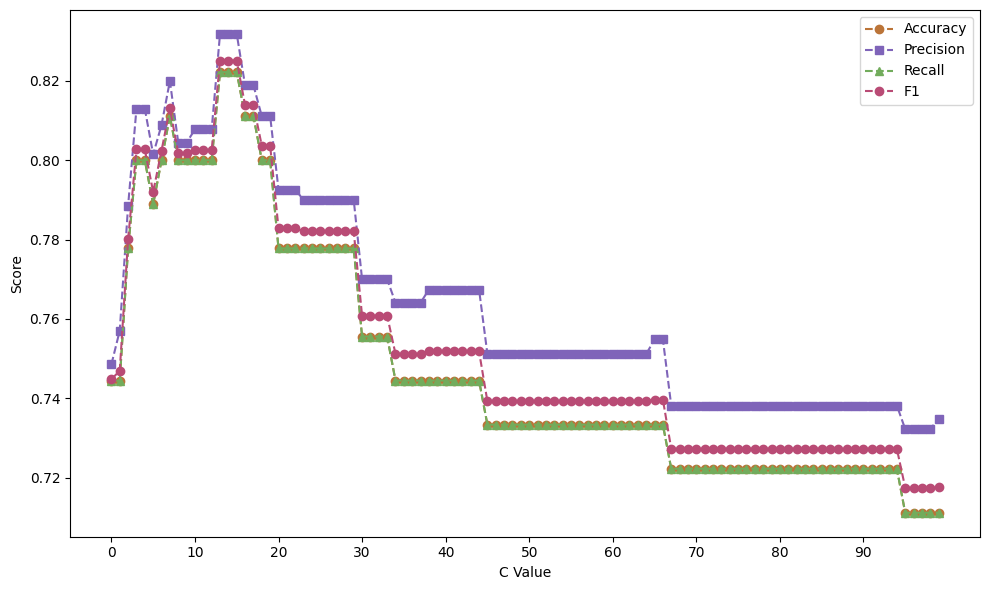

In [39]:
#first we will be testing with different C values from 1 to 101
hyperparams = hyperparams = [{"C": i} for i in range(1, 101)]
testing = "C Value"
analyze_svm_parameter(hyperparams, testing)

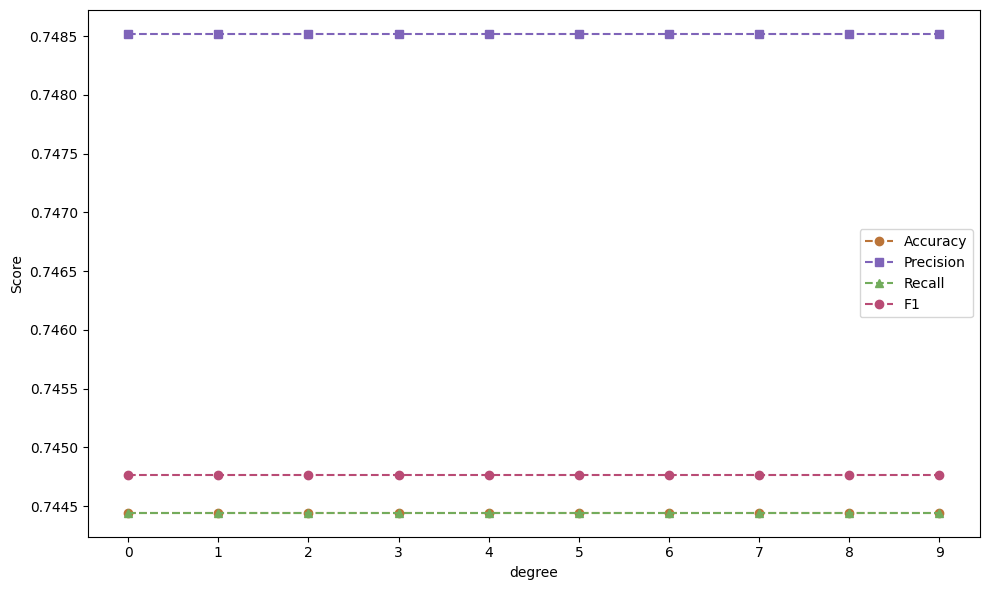

In [40]:
#Now to try polynomial degree
hyperparams = [{"degree": i} for i in range(1, 11)]
testing = "degree"
analyze_svm_parameter(hyperparams, testing)

[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]


ValueError: slice step cannot be zero

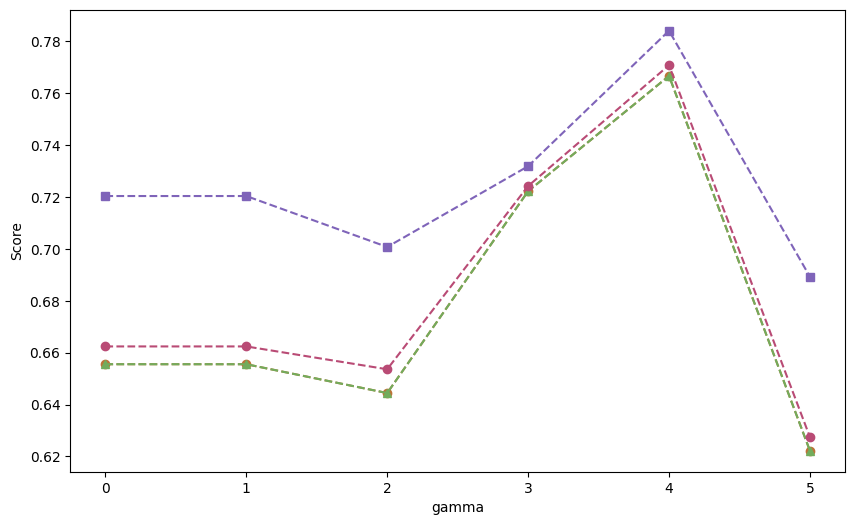

In [41]:
#Plotting affect of gamma
gamma_values = []
i = .0001
for _ in range(1,7):
    i = i * 10
    gamma_values.append(i)

print(gamma_values)
hyperparams = [{"gamma": val} for val in gamma_values]
testing = "gamma"
analyze_svm_parameter(hyperparams, testing)

ConversionError: Failed to convert value(s) to axis units: [{'kernel': 'linear'}, {'kernel': 'poly'}, {'kernel': 'rbf'}, {'kernel': 'sigmoid'}]

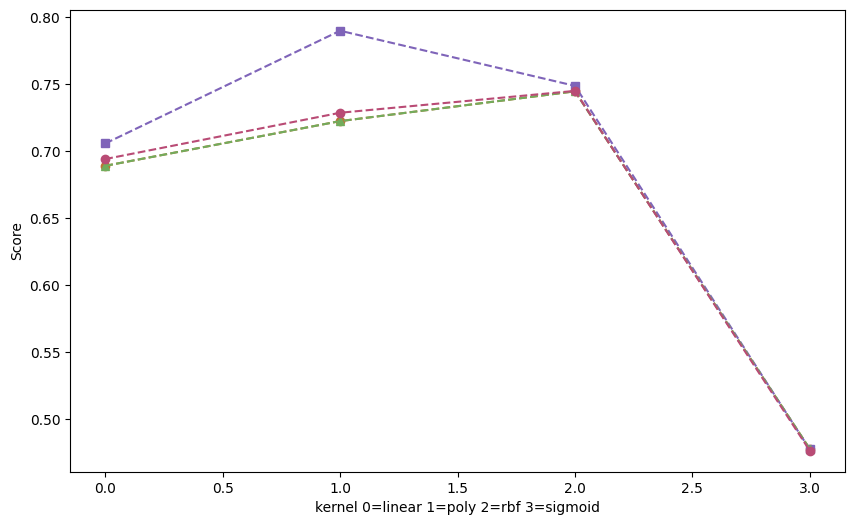

In [42]:
#Now to try each kernal
kernal_values = ['linear', 'poly', 'rbf', 'sigmoid']
hyperparams = [{"kernel": val} for val in kernal_values]
testing = "kernel 0=linear 1=poly 2=rbf 3=sigmoid"
analyze_svm_parameter(hyperparams, testing, as_is = True)

In [74]:
from sklearn.model_selection import GridSearchCV

#We can also use a gridsearch to find a good combination of all of the hyperparameters
#NOTE: This however, does not use our validation set for finding the best model and instead used CV on the train set

#for the sake of
hyperparameters = {
    'C': [0.1, 1, 10, 20, 30],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3],
    'gamma': [0.1, 0.01, 0.001]
}

#create the gridsearch operator
grid = GridSearchCV(estimator=svm, param_grid=hyperparameters, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

#train the model
grid.fit(X_train, y_train.ravel())

#this is the best model so I can do official testing results on it
best_svm_model = grid.best_estimator_

best_svm_model

Fitting 5 folds for each of 120 candidates, totalling 600 fits


SVC(C=30, degree=2, gamma=0.1, kernel='linear')

In [75]:
#Check this out above ^^ I did not realize it printed this out for you now
#It has never done that for me before :)

#Best parameters found
print(f"Best Model Parameters: {grid.best_params_}")

print(f"Best Validation Score: {grid.best_score_}")

Best Model Parameters: {'C': 30, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Best Validation Score: 0.4699999999999999


In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Now for the performance on the testing set
#to see how it stacks up

#predict the testing set instances
test_predictions = best_svm_model.predict(X_test)

#get the accuracy and print the results
accuracy = accuracy_score(y_test, test_predictions)
print(f"Final Testing Accuracy: {accuracy}")

#More general accuracy f1 measure for my own analysis
print("\nClassification Report: \n", classification_report(y_test, test_predictions))

Final Testing Accuracy: 0.7222222222222222

Classification Report: 
               precision    recall  f1-score   support

           1       0.81      0.57      0.67        30
           2       0.73      0.80      0.76        30
           3       0.67      0.80      0.73        30

    accuracy                           0.72        90
   macro avg       0.73      0.72      0.72        90
weighted avg       0.73      0.72      0.72        90



<h2>Pt. 4.3: Random Forest Model</h2>

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [50]:
#loading the random forest classifier
rf = RandomForestClassifier(n_estimators=10, random_state=12)

# Fit the regressor with x and y data
rf.fit(X_train, y_train)

#predicting the random forest on the basis of validation set values
y_pred = rf.predict(X_val)

#accuracy score for the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print("Precision: ", precision_score(y_val, y_pred, average='weighted'))
print("Recall: ", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_val, y_pred, average='weighted'))
print("Classification Report:", classification_report(y_val, y_pred))

Accuracy: 0.7444444444444445
Precision:  0.7596288084092963
Recall:  0.7444444444444445
F1 Score:  0.7392940639790158
Classification Report:               precision    recall  f1-score   support

           1       0.68      0.93      0.79        30
           2       0.78      0.70      0.74        30
           3       0.82      0.60      0.69        30

    accuracy                           0.74        90
   macro avg       0.76      0.74      0.74        90
weighted avg       0.76      0.74      0.74        90



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


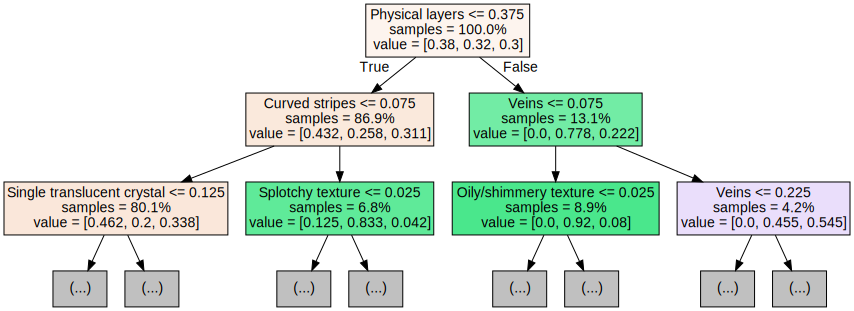

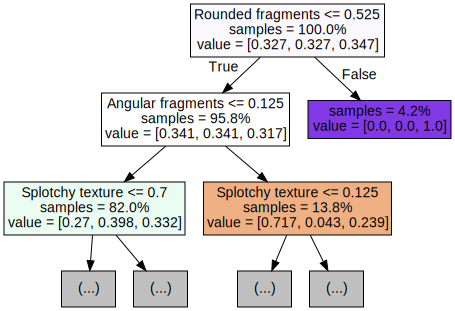

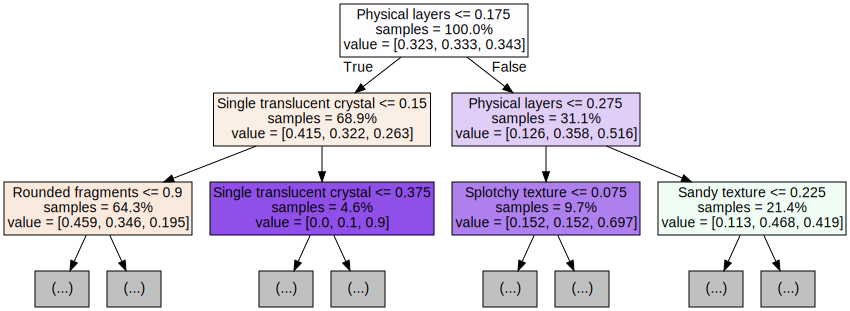

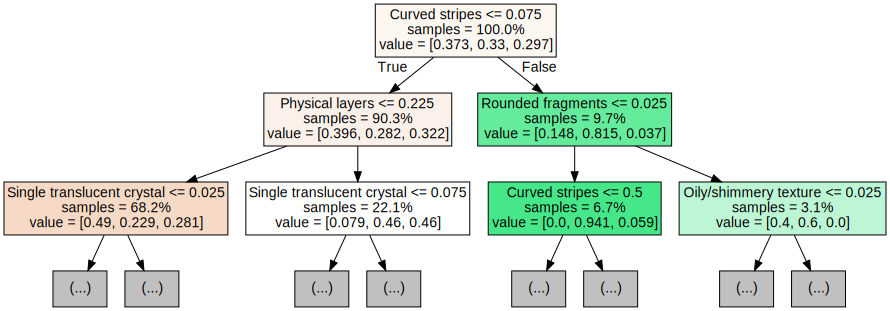

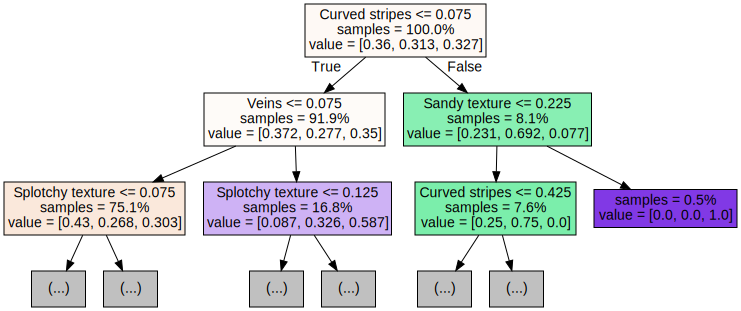

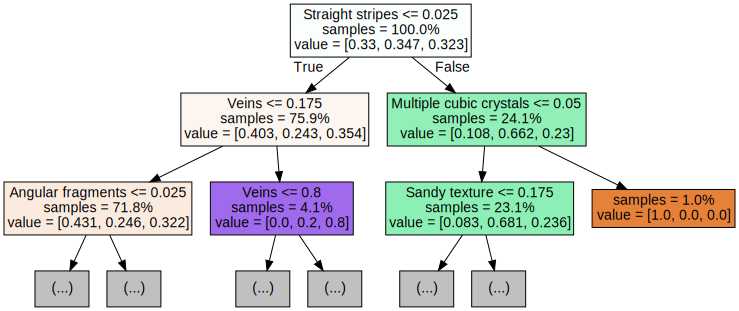

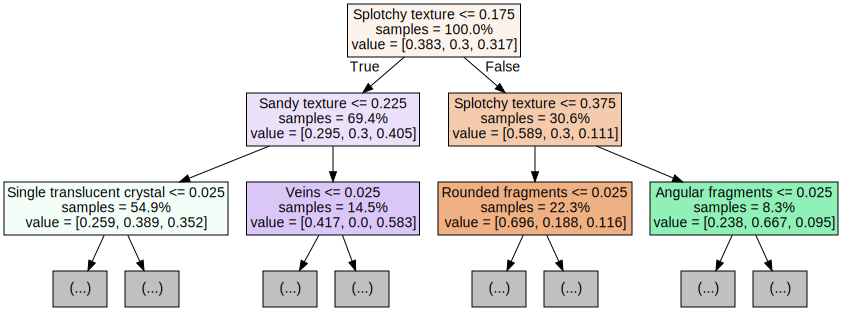

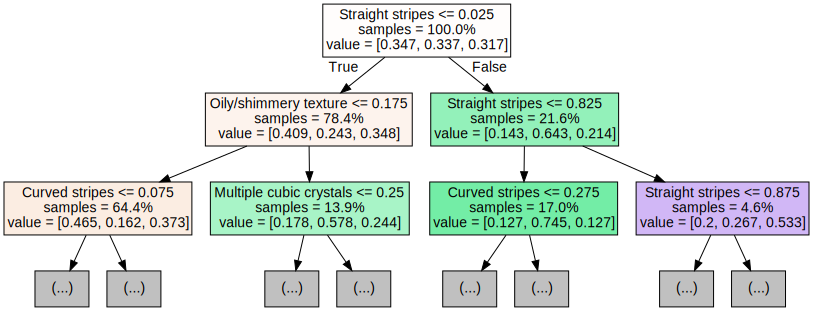

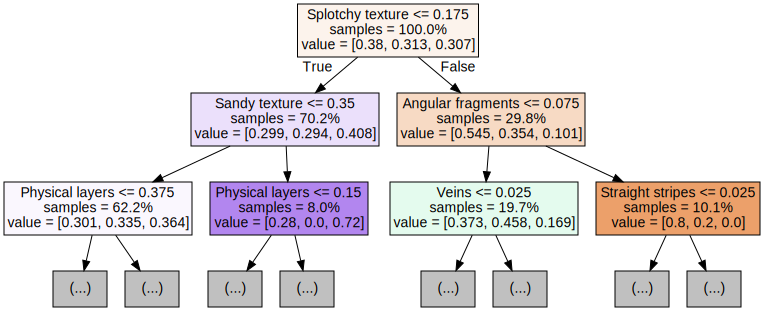

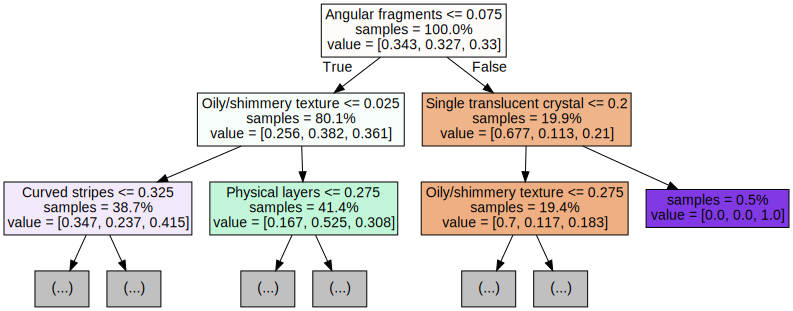

In [51]:
#First 10 tree visualisations - which attribute is used to split the data
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


for i in range(10):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=columns[1:],
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
# ## do not run this code

# param_dist = {'n_estimators': [10,50,100],
#               'max_depth': [1,3,5,10,15,20],
#               'min_samples_split': [1,3,5,10,20,30,40],
#               'min_samples_leaf': [1,3,5,10,20,30,40]}

# # Create a random forest classifier
# rf = RandomForestClassifier()

# # Use random search to find the best hyperparameters
# rand_search = GridSearchCV(estimator=rf,
#                                  param_grid = param_dist,
#                                   scoring='accuracy',
#                                  cv=5)

# # Fit the random search object to the data
# rand_search.fit(X_train, y_train)

In [ ]:
#Best parameters from GridSearchCV
# print("Best Model Parameters: ",rand_search.best_params_)

# print("Best Validation Score: ",rand_search.best_score_)

In [70]:
#Here we are using Randomized Search CV to get the best parameters for random forest
#This is more optimized way to calculate best parameters, but may not give the most optimal parameters.

param_dist = {'n_estimators': randint(1,100),
              'max_depth': randint(1,10),
              'min_samples_split': randint(1,40),
              'min_samples_leaf': randint(1,40)}

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=10, random_state=12)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(estimator=rf,
                                 param_distributions  = param_dist,
                                  scoring='accuracy',
                                 cv=3)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

#Loading the best model
best_rf_model = rand_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

In [71]:
#Best parameters from RandomizedSearchCV
print("Best Model Parameters: ",rand_search.best_params_)

print("Best Validation Score: ",rand_search.best_score_)

Best Model Parameters:  {'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 16, 'n_estimators': 35}
Best Validation Score:  0.4766666666666666


In [72]:
best_y_rf = best_rf_model.predict(X_val)

accuracy_score(y_val,best_y_rf)

0.7333333333333333

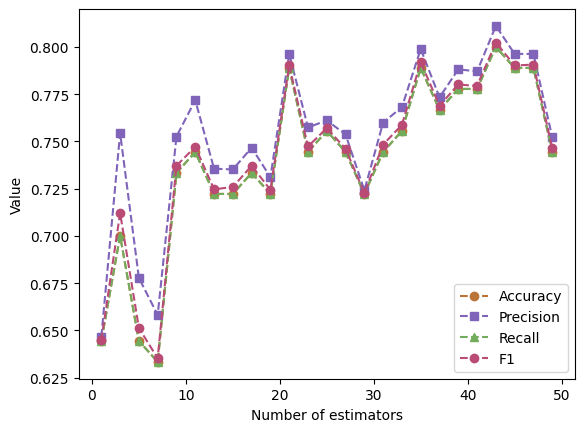

In [147]:
n_estimators = np.array([i for i in range(1,50,2)])
acc_sc = []
prec_sc = []
rec_sc = []
f1_sc =[]

for n in n_estimators:
    rf_temp = RandomForestClassifier(n_estimators= n)
    rf_temp.fit(X_train, y_train.ravel())

    rf_temp_pred = rf_temp.predict(X_val)

    acc_sc.append(accuracy_score(rf_temp_pred, y_val))
    prec_sc.append(precision_score(rf_temp_pred, y_val, average='weighted'))
    rec_sc.append(recall_score(rf_temp_pred, y_val, average='weighted'))
    f1_sc.append(f1_score(rf_temp_pred, y_val, average='weighted'))

plt.figure()
plt.plot(n_estimators,acc_sc,label = "Accuracy", color = "#bb7438", marker = "o", linestyle = "--")
plt.plot(n_estimators,prec_sc,label = "Precision", color = "#7f64b9", marker = "s", linestyle = "--")
plt.plot(n_estimators,rec_sc,label = "Recall", color = "#72ac5c", marker = "^", linestyle = "--")
plt.plot(n_estimators,f1_sc,label = "F1", color = "#b94b75", marker = "o", linestyle = "--")
plt.xlabel("Number of estimators")
plt.ylabel("Value")
# plt.xticks([i for i in range(1,50,2)],[i for i in range(1,50,2)])
plt.legend()
plt.show()

In [150]:
max_index=-1
for i in range(len(acc_sc)):
  if(acc_sc[i]==max(acc_sc)):
    max_index=i
best_n_estimators=n_estimators[max_index]

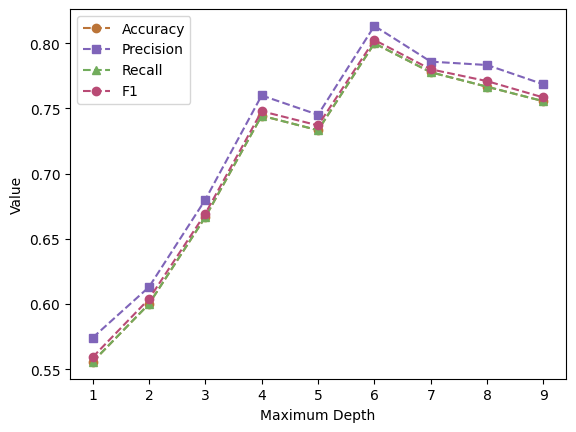

In [152]:
max_depths = np.array([i for i in range(1,10,1)])
acc_sc = []
prec_sc = []
rec_sc = []
f1_sc =[]

for n in max_depths:
    rf_temp = RandomForestClassifier(max_depth= n)
    rf_temp.fit(X_train, y_train.ravel())

    rf_temp_pred = rf_temp.predict(X_val)

    acc_sc.append(accuracy_score(rf_temp_pred, y_val))
    prec_sc.append(precision_score(rf_temp_pred, y_val, average='weighted'))
    rec_sc.append(recall_score(rf_temp_pred, y_val, average='weighted'))
    f1_sc.append(f1_score(rf_temp_pred, y_val, average='weighted'))

plt.figure()
plt.plot(max_depths,acc_sc,label = "Accuracy", color = "#bb7438", marker = "o", linestyle = "--")
plt.plot(max_depths,prec_sc,label = "Precision", color = "#7f64b9", marker = "s", linestyle = "--")
plt.plot(max_depths,rec_sc,label = "Recall", color = "#72ac5c", marker = "^", linestyle = "--")
plt.plot(max_depths,f1_sc,label = "F1", color = "#b94b75", marker = "o", linestyle = "--")
plt.xlabel("Maximum Depth")
plt.ylabel("Value")
# plt.xticks([i for i in range(1,50,2)],[i for i in range(1,50,2)])
plt.legend()
plt.show()

In [153]:
max_index=-1
for i in range(len(acc_sc)):
  if(acc_sc[i]==max(acc_sc)):
    max_index=i
best_max_depth=max_depths[max_index]

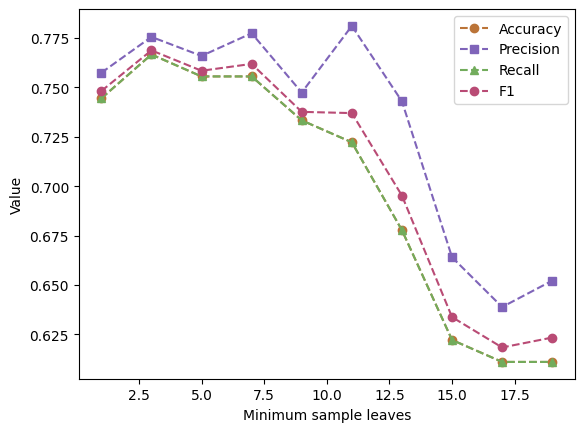

In [154]:
min_sample_leaves = np.array([i for i in range(1,20,2)])
acc_sc = []
prec_sc = []
rec_sc = []
f1_sc =[]

for n in min_sample_leaves:
    rf_temp = RandomForestClassifier(min_samples_leaf= n)
    rf_temp.fit(X_train, y_train.ravel())

    rf_temp_pred = rf_temp.predict(X_val)

    acc_sc.append(accuracy_score(rf_temp_pred, y_val))
    prec_sc.append(precision_score(rf_temp_pred, y_val, average='weighted'))
    rec_sc.append(recall_score(rf_temp_pred, y_val, average='weighted'))
    f1_sc.append(f1_score(rf_temp_pred, y_val, average='weighted'))

plt.figure()
plt.plot(min_sample_leaves,acc_sc,label = "Accuracy", color = "#bb7438", marker = "o", linestyle = "--")
plt.plot(min_sample_leaves,prec_sc,label = "Precision", color = "#7f64b9", marker = "s", linestyle = "--")
plt.plot(min_sample_leaves,rec_sc,label = "Recall", color = "#72ac5c", marker = "^", linestyle = "--")
plt.plot(min_sample_leaves,f1_sc,label = "F1", color = "#b94b75", marker = "o", linestyle = "--")
plt.xlabel("Minimum sample leaves")
plt.ylabel("Value")
# plt.xticks([i for i in range(1,50,2)],[i for i in range(1,50,2)])
plt.legend()
plt.show()

In [155]:
max_index=-1
for i in range(len(acc_sc)):
  if(acc_sc[i]==max(acc_sc)):
    max_index=i
best_min_sample_leaves=min_sample_leaves[max_index]

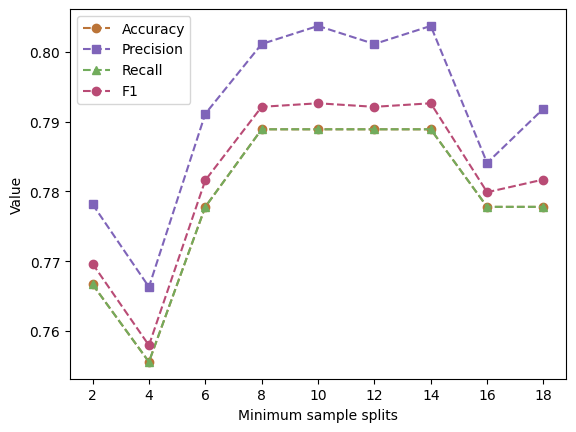

In [156]:
min_sample_splits = np.array([i for i in range(2,20,2)])
acc_sc = []
prec_sc = []
rec_sc = []
f1_sc =[]

for n in min_sample_splits:
    rf_temp = RandomForestClassifier(min_samples_split= n)
    rf_temp.fit(X_train, y_train.ravel())

    rf_temp_pred = rf_temp.predict(X_val)

    acc_sc.append(accuracy_score(rf_temp_pred, y_val))
    prec_sc.append(precision_score(rf_temp_pred, y_val, average='weighted'))
    rec_sc.append(recall_score(rf_temp_pred, y_val, average='weighted'))
    f1_sc.append(f1_score(rf_temp_pred, y_val, average='weighted'))

plt.figure()
plt.plot(min_sample_splits,acc_sc,label = "Accuracy", color = "#bb7438", marker = "o", linestyle = "--")
plt.plot(min_sample_splits,prec_sc,label = "Precision", color = "#7f64b9", marker = "s", linestyle = "--")
plt.plot(min_sample_splits,rec_sc,label = "Recall", color = "#72ac5c", marker = "^", linestyle = "--")
plt.plot(min_sample_splits,f1_sc,label = "F1", color = "#b94b75", marker = "o", linestyle = "--")
plt.xlabel("Minimum sample splits")
plt.ylabel("Value")
# plt.xticks([i for i in range(1,50,2)],[i for i in range(1,50,2)])
plt.legend()
plt.show()

In [157]:
max_index=-1
for i in range(len(acc_sc)):
  if(acc_sc[i]==max(acc_sc)):
    max_index=i
best_min_sample_splits=min_sample_splits[max_index]

In [158]:
print("n_estimators: ", best_n_estimators)
print("max depth: ",best_max_depth)
print("min sample leaves: ",best_min_sample_leaves)
print("min sample split: ",best_min_sample_splits)

n_estimators:  43
max depth:  6
min sample leaves:  3
min sample split:  14


From the above graphs we can see that the best parameters are
n_estimators:  43
max depth:  6
min sample leaves:  3
min sample split:  14

<h4>Pt. 4: Analysis</h4>

<h2>Pt. 5: Ensemble Model</h2>

In [ ]:
#this is for google colab, for importing the vecstack module
!pip install vecstack

  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19861 sha256=bf40b1914aade44237a6e44db8b3ba7aca1ebd8474b7008e3b74b4a389345b59
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


In [77]:
#implementing XGBClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from vecstack import stacking

#stacking all three models
# stacked = [best_sfmx_model, best_svm_model, best_rf_model]
stacked = [('random_forest', best_rf_model),('svm', best_svm_model), ('softmax',best_sfmx_model)]

meta = LogisticRegression()

#loading the data
st = StackingClassifier(estimators=stacked, final_estimator=meta)

st.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('random_forest',
                                RandomForestClassifier(max_depth=7,
                                                       min_samples_leaf=6,
                                                       min_samples_split=16,
                                                       n_estimators=35,
                                                       random_state=12)),
                               ('svm',
                                SVC(C=30, degree=2, gamma=0.1,
                                    kernel='linear')),
                               ('softmax', LogisticRegression(C=11))],
                   final_estimator=LogisticRegression())

The second Logistic Regression acts as the meta-classifier. It takes the predictions (or probabilities) from all base models (SVM, Logistic Regression, and Random Forest) and combines them to make the final prediction. Logistic Regression is often chosen as the meta-classifier because it’s computationally efficient and works well in combining multiple prediction probabilities into one final output.

In [78]:
st_pred = st.predict(X_val)

print("Accuracy:", accuracy_score(y_val, st_pred))
print("Precision: ", precision_score(y_val, st_pred, average='weighted'))
print("Recall: ", recall_score(y_val, st_pred, average='weighted'))
print("F1 Score: ", f1_score(y_val, st_pred, average='weighted'))
print("Classification Report:", classification_report(y_val, st_pred))

Accuracy: 0.7
Precision:  0.7130784034808803
Recall:  0.7
F1 Score:  0.6919547669814194
Classification Report:               precision    recall  f1-score   support

           1       0.70      0.87      0.78        30
           2       0.65      0.73      0.69        30
           3       0.79      0.50      0.61        30

    accuracy                           0.70        90
   macro avg       0.71      0.70      0.69        90
weighted avg       0.71      0.70      0.69        90



In [ ]:
#comparison of the models

import matplotlib.pyplot as plt
accuracy_scores_all=[]

best_svm_model.fit(X_train,y_train)
y_pred_svm= best_svm_model.predict(X_test)
accuracy_scores_all.append(accuracy_score(y_test, y_pred_svm))
print("Accuracy SVM:", accuracy_score(y_test, y_pred_svm))

best_sfmx_model.fit(X_train,y_train)
y_pred_sfmx = best_sfmx_model.predict(X_test)
accuracy_scores_all.append(accuracy_score(y_test, y_pred_sfmx))
print("Accuracy Softmax:", accuracy_score(y_test, y_pred_sfmx))

best_rf_model.fit(X_train,y_train)
y_pred_rf = best_rf_model.predict(X_test)
accuracy_scores_all.append(accuracy_score(y_test, y_pred_rf))
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))

st.fit(X_train,y_train)
y_pred_st=st.predict(X_test)
accuracy_scores_all.append(accuracy_score(y_test, y_pred_st))
print("Accuracy Stacked model:", accuracy_score(y_test, y_pred_st))

models = ['SVM', 'Softmax', 'Random Forest', 'Stacked Model']


# Create the bar plot
plt.figure(figsize=(8, 6))  # Optional: Set figure size
plt.bar(models, accuracy_scores_all, color='skyblue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores Comparison')

# Display the plot
plt.show()

<h2>Pt. 6: Humans vs. Ensemble</h2>

In [ ]:
import pandas as pd
hdata = r".\Dataset\trialData.csv"
#hdata = r"./Dataset/trialData.csv"
human = pd.read_csv(hdata,usecols = ["subid","block","trial","rocknumber","category","catresponse","cat_correct"])
human = human[human["rocknumber"].between(1,480)]
print(human.head())

human_train = human[human["block"]<=3]
human_train.reset_index(drop = True, inplace = True)
human_test = human[human["block"]>3]
human_test.reset_index(drop = True, inplace = True)

            subid  block  trial  rocknumber     category  catresponse  \
0  A1HUMXQ7SEXD8E      1      1         331  Sedimentary  Metamorphic   
1  A1HUMXQ7SEXD8E      1      2         398  Sedimentary      Igneous   
2  A1HUMXQ7SEXD8E      1      3          19      Igneous  Sedimentary   
3  A1HUMXQ7SEXD8E      1      4         338  Sedimentary  Metamorphic   
4  A1HUMXQ7SEXD8E      1      5          60      Igneous  Sedimentary   

   cat_correct  
0            0  
1            0  
2            0  
3            0  
4            0  


In [ ]:
def find_accuracy(dataset):
    dataset = dataset.copy()
    dataset.reset_index(drop = True, inplace = True)

    correct_response = 0
    for i in range(len(dataset)):
        if dataset["cat_correct"][i] == 1:
            correct_response += 1

    return correct_response/len(dataset)

print("Human train accuracy:", find_accuracy(human_train))
print("Human test accuracy:", find_accuracy(human_test))

Human train accuracy: 0.5599349490660221
Human test accuracy: 0.5984143924378716


In [ ]:
human_accuracies = {}
for j in range(1,481):
    try:
       rock = human[human["rocknumber"] == j]
    except KeyError:
        human_accuracies[j] = -1
    else:
        human_rock_accuracy = find_accuracy(rock)
        human_accuracies[j]= human_rock_accuracy
print(human_accuracies)

{1: 0.7469512195121951, 2: 0.7195121951219512, 3: 0.45121951219512196, 4: 0.5, 5: 0.5121951219512195, 6: 0.8518518518518519, 7: 0.6707317073170732, 8: 0.4024390243902439, 9: 0.6798780487804879, 10: 0.7195121951219512, 11: 0.4573170731707317, 12: 0.801829268292683, 13: 0.7195121951219512, 14: 0.7492354740061162, 15: 0.7073170731707317, 16: 0.7774390243902439, 17: 0.10975609756097561, 18: 0.07317073170731707, 19: 0.6615853658536586, 20: 0.14634146341463414, 21: 0.10975609756097561, 22: 0.13414634146341464, 23: 0.926829268292683, 24: 0.13414634146341464, 25: 0.08536585365853659, 26: 0.1712538226299694, 27: 0.78419452887538, 28: 0.8414634146341463, 29: 0.2073170731707317, 30: 0.6585365853658537, 31: 0.6972477064220184, 32: 0.4634146341463415, 33: 0.7713414634146342, 34: 0.8571428571428571, 35: 0.7981651376146789, 36: 0.8048780487804879, 37: 0.8536585365853658, 38: 0.8292682926829268, 39: 0.7920489296636085, 40: 0.9634146341463414, 41: 0.9024390243902439, 42: 0.8048780487804879, 43: 0.81707

In [ ]:
softmax_regC = LogisticRegression(solver="lbfgs", C=11, max_iter = 100)
softmax_regC.fit(X_train, y_train.ravel())

class_probabilities = softmax_regC.predict_proba(df_features)
predicted_classes = softmax_regC.predict(df_features)
predicted_class_probabilities = [probs[pred-1] for probs, pred in zip(class_probabilities, predicted_classes)]

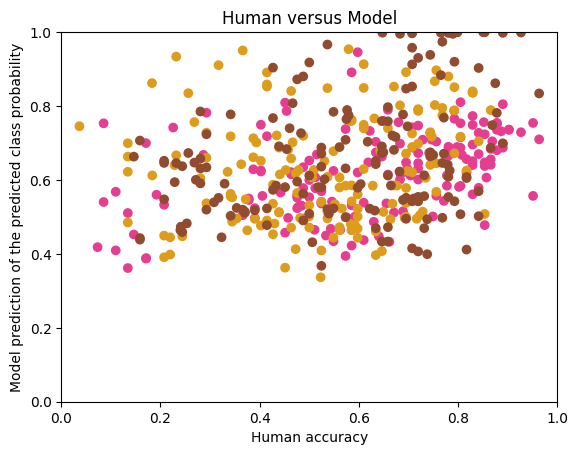

In [ ]:
color = []
for i in df_labels[1]:
    if i == 1:
        color.append("#e53e91")
    elif i == 2:
        color.append("#dd9c1c")
    elif i == 3:
        color.append("#914b2e")

plt.figure()
plt.scatter(list(human_accuracies.values()),predicted_class_probabilities, c = color)
plt.xlabel("Human accuracy")
plt.ylabel("Model prediction of the predicted class probability")
plt.title("Human versus Model")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

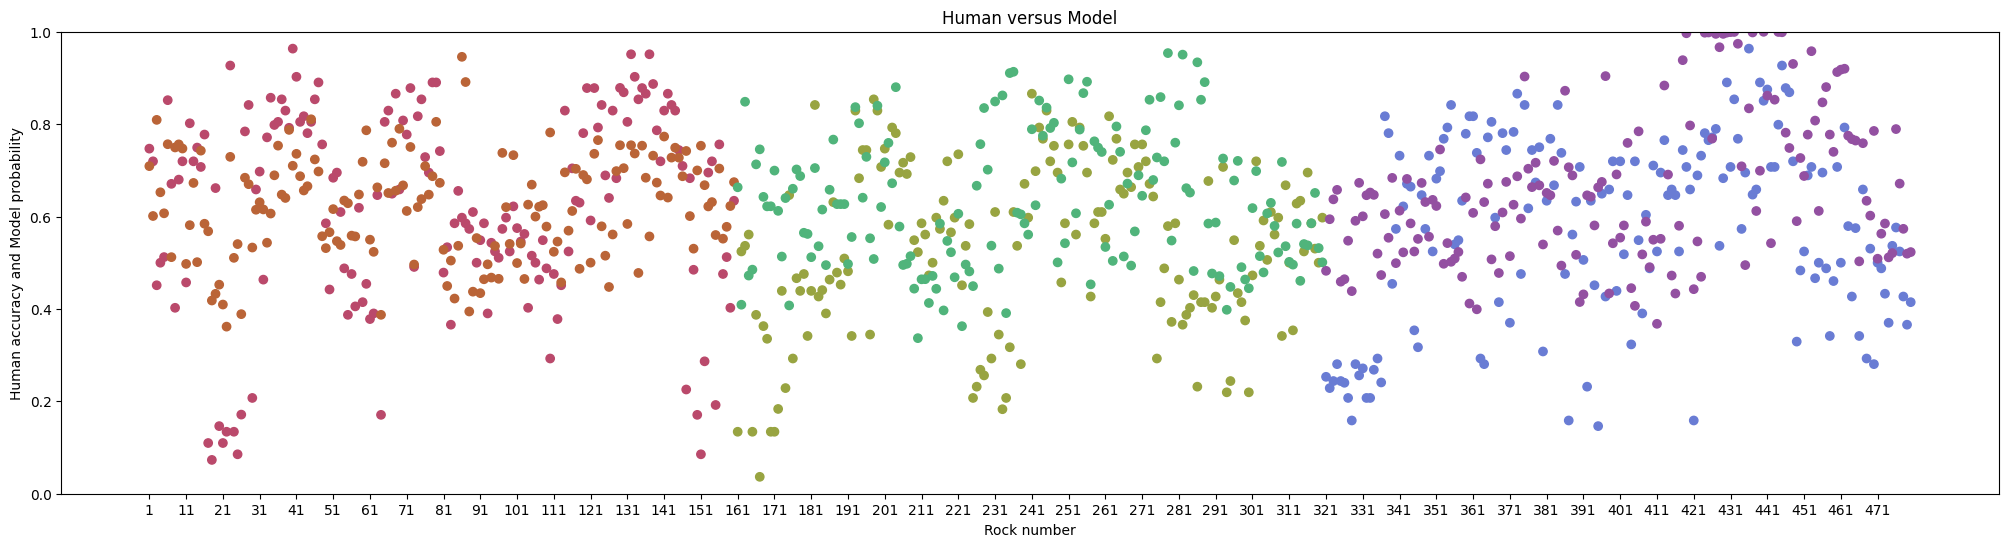

In [ ]:
chuman = []
cmodel = []

for i in df_labels[1]:
    if i == 1:
        chuman.append("#ba496b")
        cmodel.append("#ba6437")
    elif i == 2:
        chuman.append("#98a441")
        cmodel.append("#50b47b")
    elif i == 3:
        chuman.append("#697cd4")
        cmodel.append("#9350a1")


plt.figure(figsize=(25,6))
plt.scatter(list(human_accuracies.keys()),list(human_accuracies.values()), c = chuman)
plt.scatter(list(human_accuracies.keys()),predicted_class_probabilities, c = cmodel)
plt.xlabel("Rock number")
plt.ylabel("Human accuracy and Model probability")
plt.title("Human versus Model")
plt.ylim(0,1)
plt.xticks([i for i in range(1,481,10)],[i for i in range(1,481,10)])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Accuracy SVM: 0.7222222222222222
Accuracy Softmax: 0.7
Accuracy Random Forest: 0.6777777777777778
Accuracy Stacked model: 0.6444444444444445


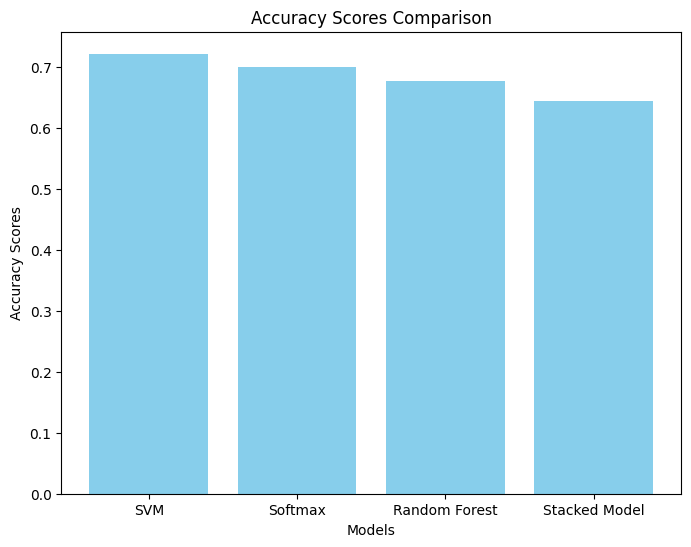